# Development of regression model

In this notebook a model will be developed that will predict the price of the car using the variables or features. This is an estimate but should providde an idea of how much the car should cost.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# read in our data

path = r'''C:\Users\Gbolahan\Desktop\Samuel file\JUPYTER WORKS\New folder\auto.csv'''

df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body_style,drive-wheels,engine-location,...,fuel-system,bore,stroke,compression_ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


From the analysis it was determined that the features best suited or the prediction of price are: Horsepower, Curb-weight, Engine-size, Highway-mpg.
A model will be deeloped using these variables

<h><b>Multiple Linear Regression</h></b>



If we want to use multiple variables in our model to predict car price, Multiple Linear Regression model will be used. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. 

In [3]:
# import our regression model

from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()
lm

LinearRegression()

In [6]:
# We define our target variable and our features
X = df[['horsepower', 'engine-size', 'highway-mpg']]
Y = df['price']

In [64]:
# lm.fit(X,Y)
# lm.coeff_
# lm.intercept_
# lm.score(X,Y)

### Viewing the regression plot of some varaibles

(0.0, 47712.53051750083)

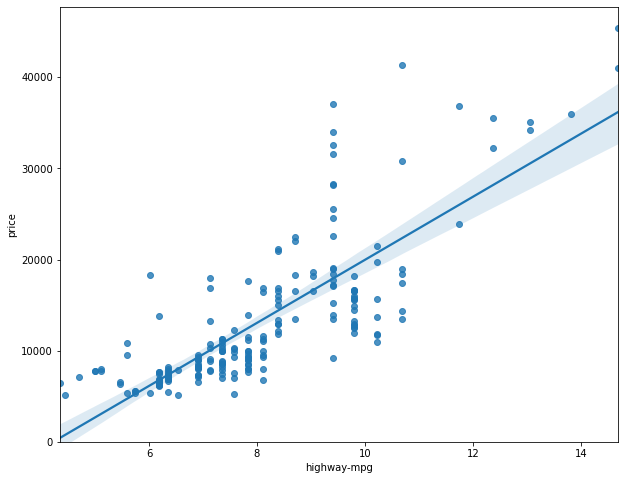

In [54]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Here we see the regression plot of highway-mpg and price, highway-mpg can be a good determinant of price because ther is a linear relationship between the 2 variables 

(0.0, 47414.1)

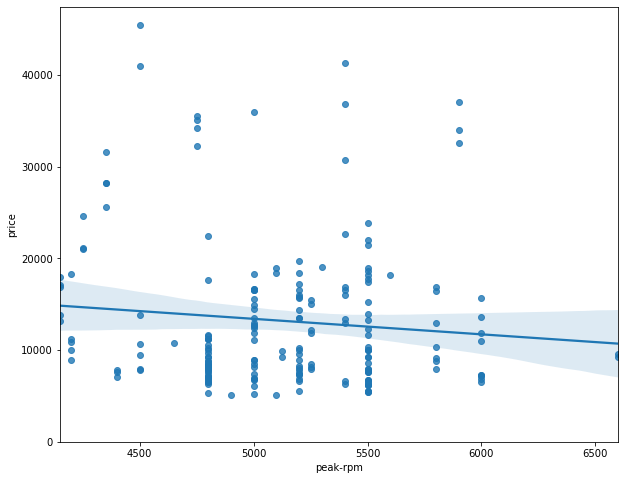

In [55]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Here we can see why peak-rpm is not a good determinant of price. The regression line of the graph is almot straight and very few of the target poimnt fits ariound the regression line

In [63]:
# the correlation between target variable and the features
df[["peak-rpm","highway-mpg",'engine-size',"price"]].corr()

,peak-rpm,highway-mpg,engine-size,price
peak-rpm,1.000000,0.017694,-0.256733,-0.101616
highway-mpg,0.017694,1.000000,0.783465,0.801118
engine-size,-0.256733,0.783465,1.000000,0.872335
price,-0.101616,0.801118,0.872335,1.000000


In [ ]:
x_data= X
y_data = Y

In [43]:
# Defining a function for plotting

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

### Import train, tet,split to split our dataset into training and testing samples

In [31]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 61
number of training samples: 140


In [32]:
lm.fit(x_train, y_train)

LinearRegression()

In [46]:
lm.score(x_train, y_train)

0.8184266531611324

In [47]:
yhat_train = lm.predict(x_train)
yhat_train[0:5]

array([31148.09865019,  7200.30706144,  7162.69622934, 10504.8260643 ,
         844.8707579 ])

In [35]:
lm.score(x_test, y_test)

0.7432729005330794

In [36]:
yhat = lm.predict(x_test)

In [40]:
yhat[0:5]

array([11291.31277762,  6246.51907127, 11359.89739939,  7356.02088465,
       15659.76805315])

In [49]:
y_test[0:5]

97      9549.0
117     6229.0
59     10245.0
35      7295.0
165     9989.0
Name: price, dtype: float64

In [41]:
df['price'].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

### Distribution plot of training data and testing data

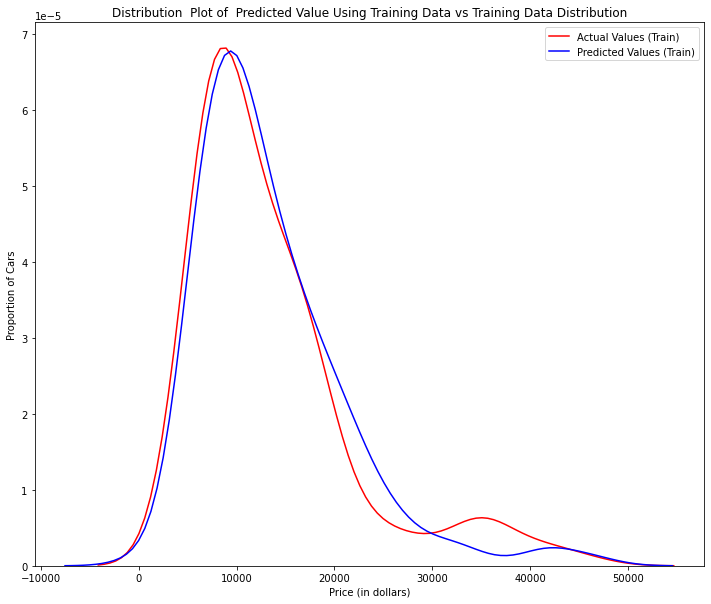

In [48]:
# Distribution Plot of Predicted Value Using Training Data

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

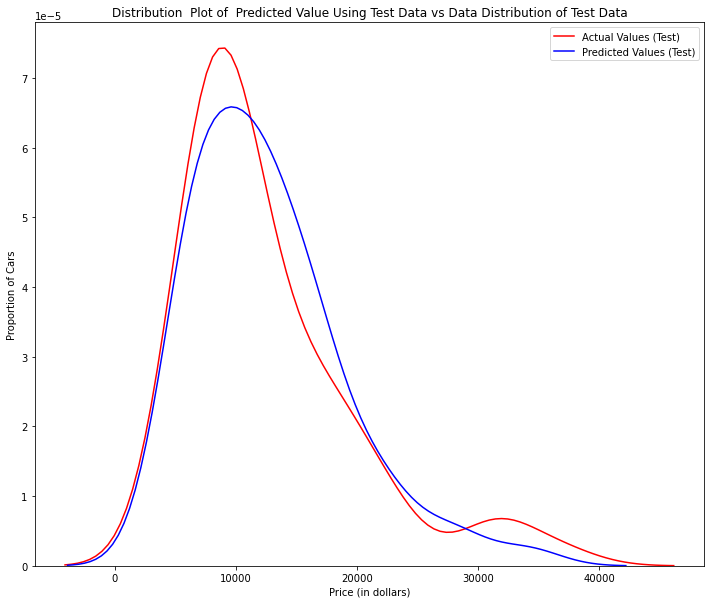

In [50]:
# Distribution Plot of Predicted Value Using Test Data

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat,"Actual Values (Test)","Predicted Values (Test)",Title)

### Calculating the R^2 and Mean Square Error

In [ ]:
from sklearn.metrics import mean_squared_error

In [57]:
print('The R-square is: ', lm.score(x_train, y_train))

The R-square is:  0.8184266531611324


In [58]:
print('The R-square is: ', lm.score(x_test, y_test))

The R-square is:  0.7432729005330794


In [61]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(y_train, yhat_train))

The mean square error of price and predicted value using multifit is:  12418925.942108676


In [62]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(y_test, yhat))

The mean square error of price and predicted value using multifit is:  12742644.392717289


We can see that athe model does a fairly good job of estimating price but at the same time the reults can be improved upon as R^2 scores and MSE are sstill poor, the model perform well for a start but it willl be improved by using other prediction models